# Run script to generate figure data

In [9]:
%%sh
./run.sh

  _______                __                
 /_  __(_)___ ___  ___  / /___  ____  ____ 
  / / / / __ `__ \/ _ \/ / __ \/ __ \/ __ \
 / / / / / / / / /  __/ / /_/ / /_/ / /_/ /
/_/ /_/_/ /_/ /_/\___/_/\____/\____/ .___/ 
                                  /_/      

Problem configuration complete.
Found Accelergy ERT (energy reference table), replacing internal energy model.
Found Accelergy ART (area reference table), replacing internal area model.
Architecture configuration complete.
Sparse optimization configuration complete.
Using threads = 1
Mapper configuration complete.
Initializing Index Factorization subspace.
  Factorization options along problem dimension M = 1
  Factorization options along problem dimension N = 1
  Factorization options along problem dimension K = 1
Mapspace Dimension [IndexFactorization] Size: 1
Mapspace Dimension [LoopPermutation] Size: 1
Mapspace Dimension [Spatial] Size: 1
Mapspace Dimension [DatatypeBypass] Size: 1
Mapspace split! Per-split Mapping Dimens

mkdir: cannot create directory ‘../output_0.01_coo’: File exists
MESSAGE: attempting to read problem shape from file: /home/git_clones/timeloop-dev/timeloop/problem-shapes/gemm-ABZ.yaml
[  0] Utilization = 0.01 | pJ/Algorithmic-Compute =    0.212 | pJ/Compute = 1541.659 | L2[ABZ] N128 M128 - L1[AB] K1 - L0[Z] K128 
[  0] STATEMENT: search algorithm is done, terminating search.
mkdir: cannot create directory ‘../output_0.01_bitmask’: File exists
MESSAGE: attempting to read problem shape from file: /home/git_clones/timeloop-dev/timeloop/problem-shapes/gemm-ABZ.yaml
[  0] Utilization = 0.00 | pJ/Algorithmic-Compute =    0.637 | pJ/Compute = 4635.859 | L2[ABZ] N128 M128 - L1[AB] K1 - L0[Z] K128 
[  0] STATEMENT: search algorithm is done, terminating search.
mkdir: cannot create directory ‘../output_0.01_bitmask.skip’: File exists
MESSAGE: attempting to read problem shape from file: /home/git_clones/timeloop-dev/timeloop/problem-shapes/gemm-ABZ.yaml
[  0] Utilization = 0.00 | pJ/Algorithmic

# Load result data

In [10]:
from parse_timeloop_output import *

# Parse edp, energy, cycles, and area from log file
def parse_edp(out_dir_name):
    
    pth = "../" + out_dir_name + "/timeloop-mapper.stats.txt"
    xml_pth = "../" + out_dir_name + "/timeloop-mapper.map+stats.xml"
    
    f=open(pth)
    log_txt=f.read()
    f.close()
    print([s for s in log_txt.split("\n") if "Algorithmic Computes" in s][1].split()[3])
    energy=float([s for s in log_txt.split("\n") if "Total topology energy" in s][0].split()[3])
    cycles=float([s for s in log_txt.split("\n") if "Max topology cycles" in s][0].split()[3])
    area=float([s for s in log_txt.split("\n") if "Total topology area" in s][0].split()[3])
    utilization=float([s for s in log_txt.split("\n") if "Utilization" in s][0].split()[1])    
    algorithmic_computes=float([s for s in log_txt.split("\n") if "Algorithmic Computes" in s][1].split()[3])       
    return {"edp":energy*cycles,"energy_pJ":energy,"cycles":cycles,"area":area,"utilization":utilization,"algorithmic_computes":algorithmic_computes,"xml":parse_timeloop_stats(xml_pth)}

In [11]:


sparse_setups = ["coo", "bitmask", "bitmask.skip"]

densities = [0.01, 0.02, 0.04, 0.08, 0.1, 0.2, 0.4, 0.8]

metrics_v_density = {sparse_setup:{} for sparse_setup in sparse_setups}

for d in densities:
    for sparse_setup in sparse_setups:
        out_dir_name="output_" + str(d) + "_" + sparse_setup
#       metrics_v_density[sparse_setup][str(d)] = parse_timeloop_stats("../" + out_dir_name + "/timeloop-mapper.map+stats.xml")
        metrics_v_density[sparse_setup][str(d)] = parse_edp(out_dir_name)

2097152
2097152
2097152
2097152
2097152
2097152
2097152
2097152
2097152
2097152
2097152
2097152
2097152
2097152
2097152
2097152
2097152
2097152
2097152
2097152
2097152
2097152
2097152
2097152


In [12]:
metrics_v_density

{'coo': {'0.01': {'edp': 15120792822.96,
   'energy_pJ': 443997.91,
   'cycles': 34056.0,
   'area': 638608.75,
   'utilization': 0.01,
   'algorithmic_computes': 2097152.0,
   'xml': {'problem': [128, 128, 128],
    'utilization': 1.0,
    'cycles': 34056,
    'energy_pJ': 443997.91419141483,
    'energy_per_mac': 0.2117147036511492,
    'macs': 2097152,
    'energy_breakdown_pJ': {'MAC': {'energy': 161.5104, 'utilization': 1.0},
     'Reg': {'energy': 8265.888431414887,
      'storage_access_energy': 8265.888431414887,
      'read_energy': 138.92659096262562,
      'temporal_add_energy': 0.0,
      'spatial_add_energy': 0.0,
      'address_generation_energy': 0.0,
      'network_energy': 0.0,
      'energy_per_access_per_instance': array([       nan,        nan, 0.48746172]),
      'actual_reads_per_instance': array([  0,   0, 285]),
      'actual_updates_per_instance': array([  0,   0, 288]),
      'actual_fills_per_instance': array([    0,     0, 16384]),
      'actual_accesses_per

# Plot result data

In [13]:
#eff_v_density_coo = [1.0/metrics_v_density["coo"][str(d)]["energy_pJ"] for d in densities]
#eff_v_density_coo_norm = [1.0 for eff in eff_v_density_coo]
#eff_v_density_bitmask = [1.0/metrics_v_density["bitmask"][str(d)]["energy_pJ"] for d in densities]
#eff_v_density_bitmask_norm = [eff_v_density_bitmask[idx]/eff_v_density_coo[idx] for idx in range(len(densities))]
#eff_v_density_bitmask_skip = [1.0/metrics_v_density["bitmask.skip"][str(d)]["energy_pJ"] for d in densities]
#eff_v_density_bitmask_skip_norm = [eff_v_density_bitmask_skip[idx]/eff_v_density_coo[idx] for idx in range(len(densities))]

# Stats cycles
stats_cycles_v_density_coo = np.array([float(metrics_v_density["coo"][str(d)]["cycles"]) for d in densities])
stats_cycles_v_density_bitmask = np.array([float(metrics_v_density["bitmask"][str(d)]["cycles"]) for d in densities])
stats_cycles_v_density_bitmask_skip = np.array([float(metrics_v_density["bitmask.skip"][str(d)]["cycles"]) for d in densities])

# Stats energy
stats_energy_v_density_coo = np.array([metrics_v_density["coo"][str(d)]["energy_pJ"] for d in densities])
stats_energy_v_density_bitmask = np.array([metrics_v_density["bitmask"][str(d)]["energy_pJ"] for d in densities])
stats_energy_v_density_bitmask_skip = np.array([metrics_v_density["bitmask.skip"][str(d)]["energy_pJ"] for d in densities])

# Stats area
stats_area_v_density_coo = np.array([metrics_v_density["coo"][str(d)]["area"] for d in densities])
stats_area_v_density_bitmask = np.array([metrics_v_density["bitmask"][str(d)]["area"] for d in densities])
stats_area_v_density_bitmask_skip = np.array([metrics_v_density["bitmask.skip"][str(d)]["area"] for d in densities])

# Stats utilization
stats_utilization_v_density_coo = np.array([metrics_v_density["coo"][str(d)]["utilization"] for d in densities])
stats_utilization_v_density_bitmask = np.array([metrics_v_density["bitmask"][str(d)]["utilization"] for d in densities])
stats_utilization_v_density_bitmask_skip = np.array([metrics_v_density["bitmask.skip"][str(d)]["utilization"] for d in densities])

# XML utilization
xml_util_v_density_coo = np.array([metrics_v_density["coo"][str(d)]["xml"]["utilization"] for d in densities])
xml_util_v_density_bitmask = np.array([metrics_v_density["bitmask"][str(d)]["xml"]["utilization"] for d in densities])
xml_util_v_density_bitmask_skip = np.array([metrics_v_density["bitmask.skip"][str(d)]["xml"]["utilization"] for d in densities])

# XML cycles
xml_cycles_v_density_coo = np.array([metrics_v_density["coo"][str(d)]["xml"]["cycles"] for d in densities])
xml_cycles_v_density_bitmask = np.array([metrics_v_density["bitmask"][str(d)]["xml"]["cycles"] for d in densities])
xml_cycles_v_density_bitmask_skip = np.array([metrics_v_density["bitmask.skip"][str(d)]["xml"]["cycles"] for d in densities])

# XML energy
xml_energy_v_density_coo = np.array([metrics_v_density["coo"][str(d)]["xml"]["energy_pJ"] for d in densities])
xml_energy_v_density_bitmask = np.array([metrics_v_density["bitmask"][str(d)]["xml"]["energy_pJ"] for d in densities])
xml_energy_v_density_bitmask_skip = np.array([metrics_v_density["bitmask.skip"][str(d)]["xml"]["energy_pJ"] for d in densities])

# XML energy per MAC
xml_epm_v_density_coo = np.array([metrics_v_density["coo"][str(d)]["xml"]["energy_per_mac"] for d in densities])
xml_epm_v_density_bitmask = np.array([metrics_v_density["bitmask"][str(d)]["xml"]["energy_per_mac"] for d in densities])
xml_epm_v_density_bitmask_skip = np.array([metrics_v_density["bitmask.skip"][str(d)]["xml"]["energy_per_mac"] for d in densities])

# XML backing store accesses
xml_backing_access_v_density_coo = np.array([np.sum(metrics_v_density["coo"][str(d)]["xml"]["energy_breakdown_pJ"]["BackingStorage"]['actual_reads_per_instance']) for d in densities])
xml_backing_access_v_density_bitmask = np.array([np.sum(metrics_v_density["bitmask"][str(d)]["xml"]["energy_breakdown_pJ"]["BackingStorage"]['actual_reads_per_instance']) for d in densities])
xml_backing_access_v_density_bitmask_skip = np.array([np.sum(metrics_v_density["bitmask.skip"][str(d)]["xml"]["energy_breakdown_pJ"]["BackingStorage"]['actual_reads_per_instance']) for d in densities])


# Speed = stats reciprocal cycles
speed_v_density_coo = 1.0/stats_cycles_v_density_coo
speed_v_density_coo_norm = speed_v_density_coo*0.0 + 1.0
speed_v_density_bitmask = 1.0/stats_cycles_v_density_bitmask
speed_v_density_bitmask_norm = speed_v_density_bitmask/speed_v_density_coo
speed_v_density_bitmask_skip = 1.0/stats_cycles_v_density_bitmask_skip
speed_v_density_bitmask_skip_norm = speed_v_density_bitmask_skip/speed_v_density_coo

# Efficiency = stats reciprocal energy
eff_v_density_coo = stats_energy_v_density_coo
eff_v_density_coo_norm = eff_v_density_coo * 0.0 + 1.0 #normalization baseline
eff_v_density_bitmask = stats_energy_v_density_bitmask
eff_v_density_bitmask_norm = eff_v_density_coo/eff_v_density_bitmask
eff_v_density_bitmask_skip = stats_energy_v_density_bitmask_skip
eff_v_density_bitmask_skip_norm = eff_v_density_coo/eff_v_density_bitmask_skip

# Utilization = 
util_v_density_coo = stats_utilization_v_density_coo
util_v_density_coo_norm = util_v_density_coo * 0.0 + 1.0 #normalization baseline
util_v_density_bitmask = stats_utilization_v_density_bitmask
util_v_density_bitmask_norm = util_v_density_bitmask/util_v_density_coo
util_v_density_bitmask_skip = stats_utilization_v_density_bitmask_skip
util_v_density_bitmask_skip_norm = util_v_density_bitmask_skip/util_v_density_coo

# Backing store memory accesses = 
backing_access_v_density_coo = xml_backing_access_v_density_coo
backing_access_v_density_coo_norm = backing_access_v_density_coo * 0.0 + 1.0 #normalization baseline
backing_access_v_density_bitmask = xml_backing_access_v_density_bitmask
backing_access_v_density_bitmask_norm = backing_access_v_density_bitmask/backing_access_v_density_coo
backing_access_v_density_bitmask_skip = xml_backing_access_v_density_bitmask_skip
backing_access_v_density_bitmask_skip_norm = backing_access_v_density_bitmask_skip/backing_access_v_density_coo

#eff_v_density_coo = [float(metrics_v_density["coo"][str(d)]["cycles"])/metrics_v_density["coo"][str(d)]["energy_pJ"] for d in densities]
#eff_v_density_coo_norm = [1.0 for eff in eff_v_density_coo]
#eff_v_density_bitmask = [float(metrics_v_density["bitmask"][str(d)]["cycles"])/metrics_v_density["bitmask"][str(d)]["energy_pJ"] for d in densities]
#eff_v_density_bitmask_norm = [eff_v_density_bitmask[idx]/eff_v_density_coo[idx] for idx in range(len(densities))]
#eff_v_density_bitmask_skip = [float(metrics_v_density["bitmask.skip"][str(d)]["cycles"])/metrics_v_density["bitmask.skip"][str(d)]["energy_pJ"] for d in densities]
#eff_v_density_bitmask_skip_norm = [eff_v_density_bitmask_skip[idx]/eff_v_density_coo[idx] for idx in range(len(densities))]



# XML reciprocal energy
#eff_v_density_coo = 1.0/xml_energy_v_density_coo
#eff_v_density_coo_norm = eff_v_density_coo * 0.0 + 1.0 #normalization baseline
#eff_v_density_bitmask = 1.0/xml_energy_v_density_bitmask
#eff_v_density_bitmask_norm = eff_v_density_bitmask/eff_v_density_coo
#eff_v_density_bitmask_skip = 1.0/xml_energy_v_density_bitmask_skip
#eff_v_density_bitmask_skip_norm = eff_v_density_bitmask_skip/eff_v_density_coo

# XML stats cycles over xml energy
#eff_v_density_coo = stats_cycles_v_density_coo/xml_energy_v_density_coo
#eff_v_density_coo_norm = eff_v_density_coo * 0.0 + 1.0 #normalization baseline
#eff_v_density_bitmask = stats_cycles_v_density_bitmask/xml_energy_v_density_bitmask
#eff_v_density_bitmask_norm = eff_v_density_bitmask/eff_v_density_coo
#eff_v_density_bitmask_skip = stats_cycles_v_density_bitmask_skip/xml_energy_v_density_bitmask_skip
#eff_v_density_bitmask_skip_norm = eff_v_density_bitmask_skip/eff_v_density_coo

# XML xml cycles over xml energy
#eff_v_density_coo = xml_cycles_v_density_coo/xml_energy_v_density_coo
#eff_v_density_coo_norm = eff_v_density_coo * 0.0 + 1.0 #normalization baseline
#eff_v_density_bitmask = xml_cycles_v_density_bitmask/xml_energy_v_density_bitmask
#eff_v_density_bitmask_norm = eff_v_density_bitmask/eff_v_density_coo
#eff_v_density_bitmask_skip = xml_cycles_v_density_bitmask_skip/xml_energy_v_density_bitmask_skip
#eff_v_density_bitmask_skip_norm = eff_v_density_bitmask_skip/eff_v_density_coo

# XML energy per MAC
#eff_v_density_coo = xml_epm_v_density_coo
#eff_v_density_coo_norm = eff_v_density_coo * 0.0 + 1.0 #normalization baseline
#eff_v_density_bitmask = xml_epm_v_density_bitmask
#eff_v_density_bitmask_norm = eff_v_density_bitmask/eff_v_density_coo
#eff_v_density_bitmask_skip = xml_epm_v_density_bitmask_skip
#eff_v_density_bitmask_skip_norm = eff_v_density_bitmask_skip/eff_v_density_coo

Text(0.5, 0.98, 'Analysis of architecture employing different representation & workload densities')

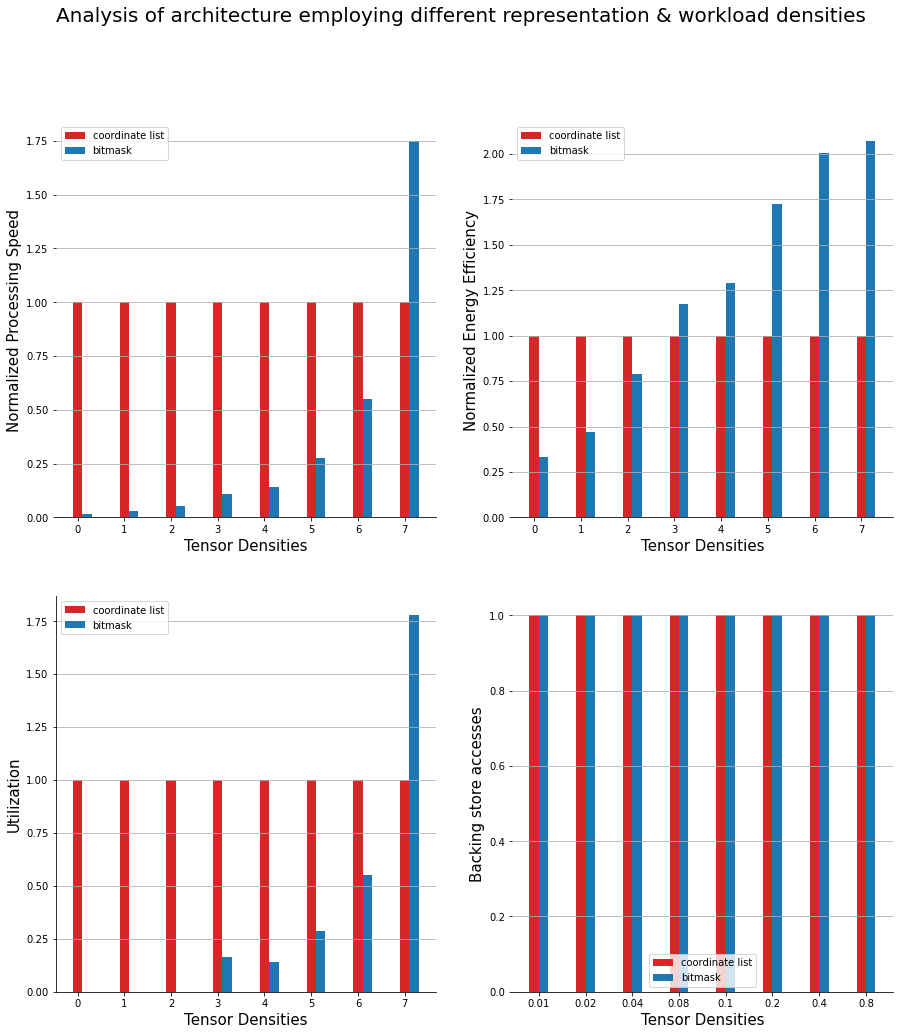

In [14]:
import matplotlib.pyplot as plt
import numpy as np

axis_font_size = 15

bar_width = 0.2

indices = np.arange(len(densities))

# 4 plots
f, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2, 2, sharey=False, figsize=(15,16))

# Top-left: normalized processing speed
ax1.bar(x=indices,height=speed_v_density_coo_norm,width=0.2,color="tab:red")
ax1.bar(x=indices + bar_width,height=speed_v_density_bitmask_norm,width=0.2,color="tab:blue")
#ax1.bar(x=indices + bar_width*2.0,height=speed_v_density_bitmask_skip_norm,width=0.2,color="saddlebrown")
plt.xticks(indices + bar_width / 2, tuple([str(d) for d in densities]))
#ax1.legend(["bitmask","bitmask+skip","coordinate list"],loc='best')
ax1.legend(["coordinate list","bitmask"],loc='best')
ax1.set_xlabel("Tensor Densities",fontsize=axis_font_size)
ax1.set_ylabel("Normalized Processing Speed",fontsize=axis_font_size)
ax1.yaxis.grid()
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
#axes.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(False)

# Top-right: normalized energy efficiency
ax2.bar(x=indices,height=eff_v_density_coo_norm,width=0.2,color="tab:red")
ax2.bar(x=indices + bar_width,height=eff_v_density_bitmask_norm,width=0.2,color="tab:blue")
#ax2.bar(x=indices + bar_width*2.0,height=eff_v_density_bitmask_skip_norm,width=0.2,color="saddlebrown")
plt.xticks(indices + bar_width / 2, tuple([str(d) for d in densities]))
#ax2.legend(["bitmask","bitmask+skip","coordinate list"],loc='best')
ax2.legend(["coordinate list","bitmask"],loc='best')
ax2.set_xlabel("Tensor Densities",fontsize=axis_font_size)
ax2.set_ylabel("Normalized Energy Efficiency",fontsize=axis_font_size)
ax2.yaxis.grid()
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
#axes.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)

# Bottom-left: utilization
ax3.bar(x=indices,height=util_v_density_coo_norm,width=0.2,color="tab:red")
ax3.bar(x=indices + bar_width,height=util_v_density_bitmask_norm,width=0.2,color="tab:blue")
#ax1.bar(x=indices + bar_width*2.0,height=speed_v_density_bitmask_skip_norm,width=0.2,color="saddlebrown")
plt.xticks(indices + bar_width / 2, tuple([str(d) for d in densities]))
#ax1.legend(["bitmask","bitmask+skip","coordinate list"],loc='best')
ax3.legend(["coordinate list","bitmask"],loc='best')
ax3.set_xlabel("Tensor Densities",fontsize=axis_font_size)
ax3.set_ylabel("Utilization",fontsize=axis_font_size)
ax3.yaxis.grid()
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
#axes.spines['bottom'].set_visible(False)
ax4.spines['left'].set_visible(False)

# Bottom-right: backing store memory accesses
ax4.bar(x=indices,height=backing_access_v_density_coo_norm,width=0.2,color="tab:red")
ax4.bar(x=indices + bar_width,height=backing_access_v_density_bitmask_norm,width=0.2,color="tab:blue")
#ax1.bar(x=indices + bar_width*2.0,height=speed_v_density_bitmask_skip_norm,width=0.2,color="saddlebrown")
plt.xticks(indices + bar_width / 2, tuple([str(d) for d in densities]))
#ax1.legend(["bitmask","bitmask+skip","coordinate list"],loc='best')
ax4.legend(["coordinate list","bitmask"],loc='best')
ax4.set_xlabel("Tensor Densities",fontsize=axis_font_size)
ax4.set_ylabel("Backing store accesses",fontsize=axis_font_size)
ax4.yaxis.grid()
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)
#axes.spines['bottom'].set_visible(False)
ax4.spines['left'].set_visible(False)


plt.suptitle('Analysis of architecture employing different representation & workload densities',fontsize=20)

In [15]:
util_v_density_coo

array([0.01, 0.01, 0.03, 0.06, 0.07, 0.14, 0.29, 0.36])

In [16]:
eff_v_density_bitmask_norm

array([0.332551  , 0.47067277, 0.78827842, 1.17469676, 1.28743522,
       1.72604001, 2.00257536, 2.07149375])